# Titanic: Machine Learning from Disaster (Kaggle)
https://www.kaggle.com/c/titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Step 1 - Load Necessary Libraries

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

# Settings
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (16, 6)

## Data Description: 
- survival: Survival (0 = No; 1 = Yes)
- pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- ticket: Ticket Number
- fare: Passenger Fare
- cabin: Cabin
- embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- Special Notes:

Feature Description:
- Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5
- With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.
    - Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    - Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    - Parent: Mother or Father of Passenger Aboard Titanic
    - Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
    - Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them. As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

### Step 2 - Load Titanic Train & Test Dataset

In [3]:
# Load Titanic train dataset
train_url = 'https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/kaggle_titanic_train.csv'
titanic_train_org = pd.read_csv(train_url)

# Load Titanic test dataset
test_url = 'https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/kaggle_titanic_test.csv'
titanic_test_org = pd.read_csv(test_url)

# train set dimension
print('Train dataset dimension: {} rows, {} columns'.format(titanic_train_org.shape[0], titanic_train_org.shape[1]))

# test set dimension
print('Test dataset dimension: {} rows, {} columns'.format(titanic_test_org.shape[0], titanic_test_org.shape[1]))

# View train data
titanic_train_org.head()

Train dataset dimension: 891 rows, 12 columns
Test dataset dimension: 418 rows, 11 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Metadata of Titatnic dataset
titanic_train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Descriptive statistics
titanic_train_org.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Crosby, Miss. Harriet R",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Step 3 - Feature Exploratory Data Analysis [EDA]
There are missing values in Age, Cabin and Embarked. We need to handle the null values and also let's see how various features are corelate to Survived response variable.

In [6]:
titanic_data = titanic_train_org.copy() # Copy original titanic dataset for feature changes

# Let's add another variable for opposite of Survived for counting purpose
titanic_data['Died'] = 1 - titanic_data['Survived']
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


        Survived  Died
Pclass                
1            136    80
2             87    97
3            119   372


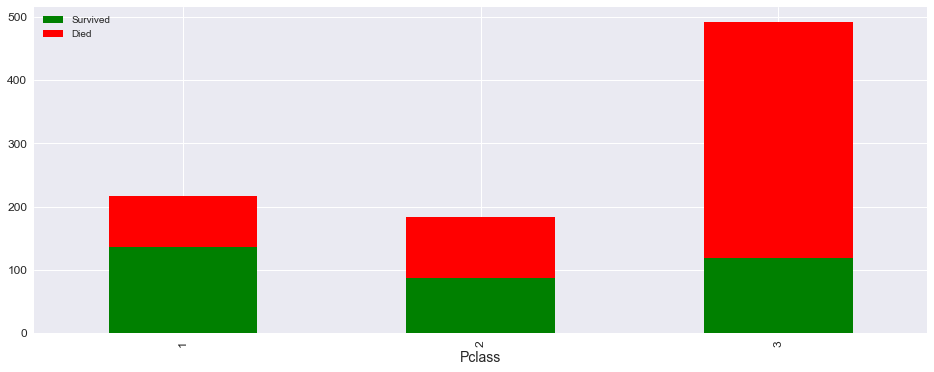

In [7]:
# How many Survived & Died based Pclass feature
print(titanic_data.groupby('Pclass').agg('sum')[['Survived', 'Died']])
titanic_data.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True, colors=['green', 'red']);

        Survived  Died
Sex                   
female       233    81
male         109   468


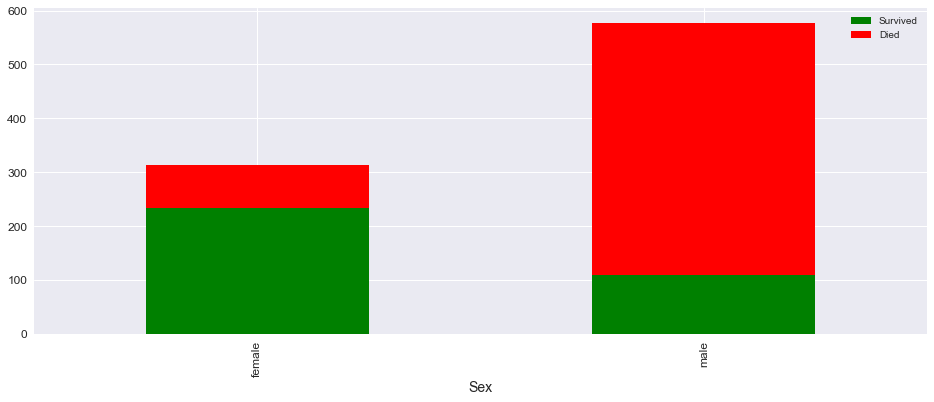

In [8]:
# How many Survived & Died based Sex feature
print(titanic_data.groupby('Sex').agg('sum')[['Survived', 'Died']])
titanic_data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True, colors=['green', 'red']);

            Survived  Died
FamilySize                
1                163   374
2                 89    72
3                 59    43
4                 21     8
5                  3    12
6                  3    19
7                  4     8
8                  0     6
11                 0     7


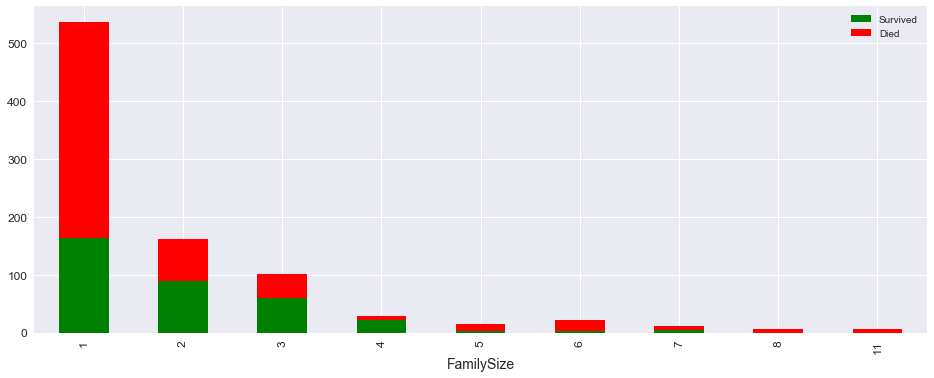

In [9]:
# How many Survived & Died based on Family size derived from SibSp & Parch feature
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
print(titanic_data.groupby('FamilySize').agg('sum')[['Survived', 'Died']])
titanic_data.groupby('FamilySize').agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True, colors=['green', 'red']);

         Survived  Died
IsAlone                
0             179   175
1             163   374


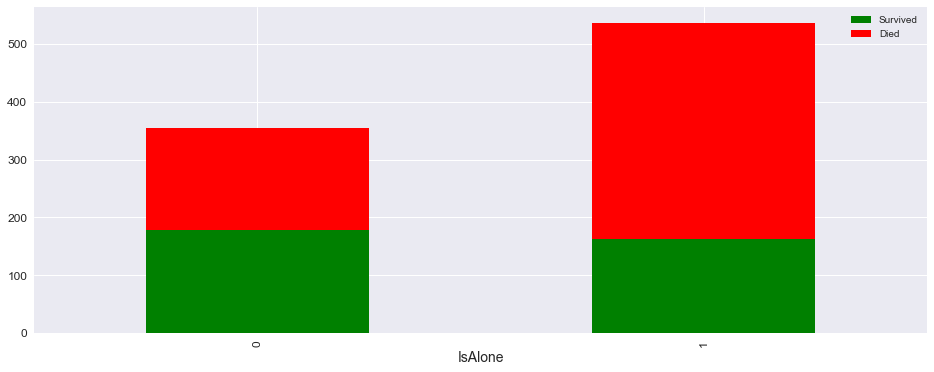

In [10]:
# How many Survived & Died based on whether passenger is Alone or not derived from Family size
titanic_data['IsAlone'] = np.where(titanic_data.FamilySize == 1, 1, 0)
print(titanic_data.groupby('IsAlone').agg('sum')[['Survived', 'Died']])
titanic_data.groupby('IsAlone').agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True, colors=['green', 'red']);

          Survived  Died
Embarked                
C               93    75
Q               30    47
S              219   427


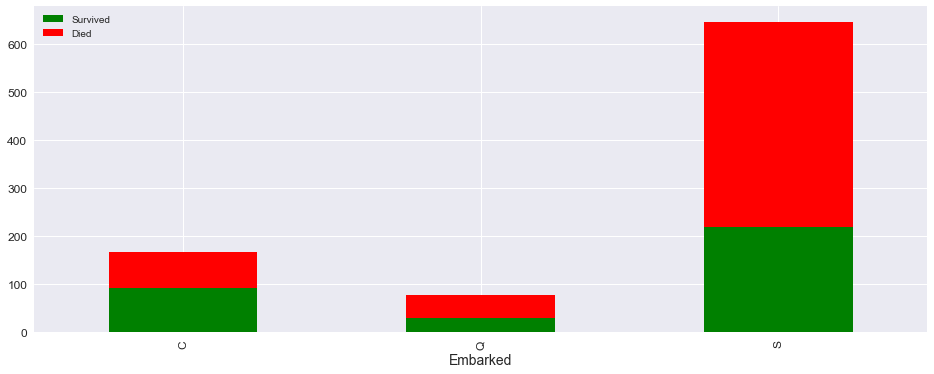

In [11]:
# find most frequent Embarked value and store in variable
most_embarked = titanic_data.Embarked.value_counts().index[0]

# fill NaN with most_embarked value
titanic_data.Embarked = titanic_data.Embarked.fillna(most_embarked)

# How many Survived & Died based on Embarked feature
print(titanic_data.groupby('Embarked').agg('sum')[['Survived', 'Died']])
titanic_data.groupby('Embarked').agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True, colors=['green', 'red']);

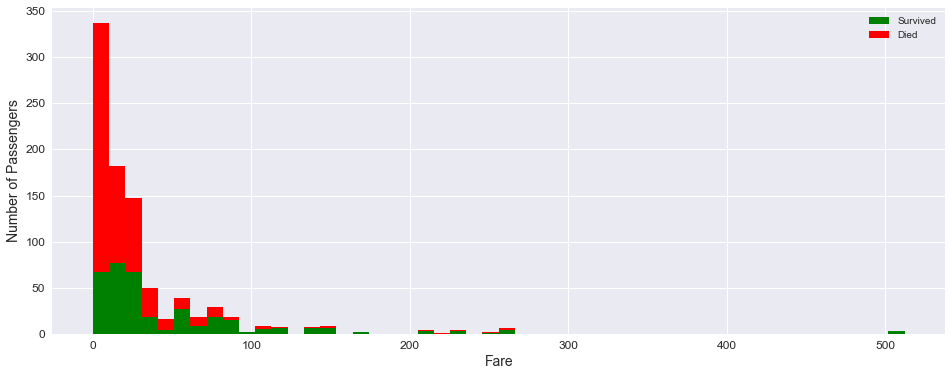

In [12]:
# How many Survived & Died based on Fare feature
plt.hist([titanic_data[titanic_data['Survived'] == 1]['Fare'], titanic_data[titanic_data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['green', 'red'],
         bins = 50, label = ['Survived', 'Died']);
plt.xlabel('Fare'); plt.ylabel('Number of Passengers'); plt.legend();

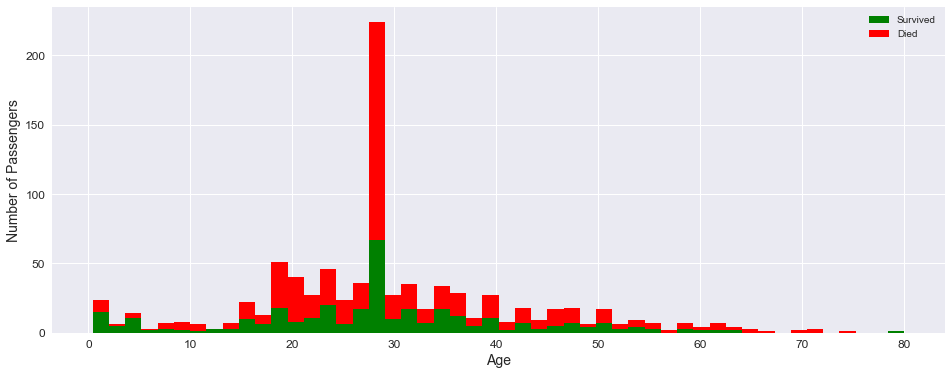

In [13]:
# How many Survived & Died based on Age feature
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median()) # imputing null values with median value temporarily
plt.hist([titanic_data[titanic_data['Survived'] == 1]['Age'], titanic_data[titanic_data['Survived'] == 0]['Age']], 
         stacked=True, color = ['green', 'red'],
         bins = 50, label = ['Survived', 'Died']);
plt.xlabel('Age'); plt.ylabel('Number of Passengers'); plt.legend();

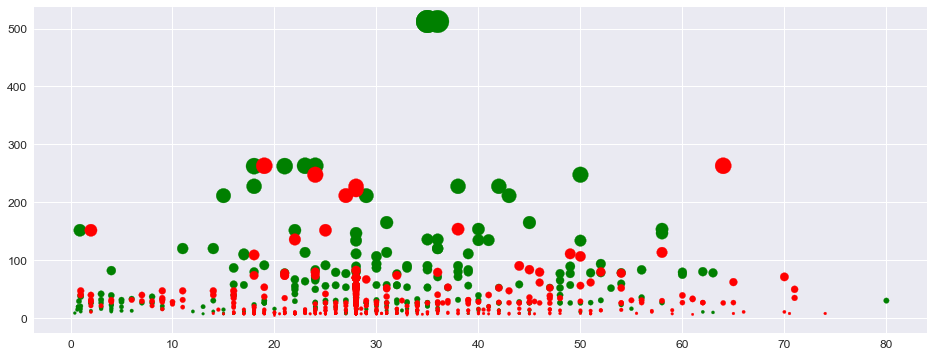

In [14]:
ax = plt.subplot()
ax.scatter(titanic_data[titanic_data['Survived'] == 1]['Age'], titanic_data[titanic_data['Survived'] == 1]['Fare'], 
           c='green', s=titanic_data[titanic_data['Survived'] == 1]['Fare'])
ax.scatter(titanic_data[titanic_data['Survived'] == 0]['Age'], titanic_data[titanic_data['Survived'] == 0]['Fare'], 
           c='red', s=titanic_data[titanic_data['Survived'] == 0]['Fare']);

### Step 4 - Feature Engineering
- Imputing null values
- Transform categorical features
- Identify new features based on existing features

In [15]:
# Combine both train and test dataset for feature engineering
combined_data = pd.DataFrame()
combined_data = combined_data.append(titanic_train_org)
combined_data = combined_data.append(titanic_test_org)
combined_data.drop(['PassengerId'], axis=1, inplace=True)
combined_data.reset_index(drop=True, inplace=True)

# create indexes to separate data later on
train_idx = len(titanic_train_org)
test_idx = len(combined_data) - len(titanic_test_org)

print('Combined dataset dimension: {} rows, {} columns'.format(combined_data.shape[0], combined_data.shape[1]))

combined_data.head()

Combined dataset dimension: 1309 rows, 11 columns


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [16]:
titles = set()
for name in combined_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)

{'Sir', 'Col', 'Don', 'Ms', 'Miss', 'Capt', 'Mrs', 'Dr', 'Mr', 'Master', 'Jonkheer', 'Dona', 'the Countess', 'Major', 'Rev', 'Mme', 'Lady', 'Mlle'}


In [17]:
# Let's categorize titles using below dic
Title_Dictionary = {"Capt": "Special", "Col": "Special", "Major": "Special", "Jonkheer": "Special", "Don": "Special",
                    "Sir" : "Special", "Dr": "Special", "Rev": "Special", "the Countess":"Special", "Mme": "Mrs", "Mr" : "Mr",
                    "Mlle": "Miss", "Ms": "Mrs", "Mrs" : "Mrs", "Miss" : "Miss", "Master" : "Master", "Lady" : "Special"}

# Let's extract the title from each name
combined_data['Title'] = combined_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
# a map of more aggregated title. Let's map each title
combined_data['Title'] = combined_data.Title.map(Title_Dictionary)
combined_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Mr


In [18]:
combined_data[combined_data['Title'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
1305,39.0,C105,C,108.9,"Oliva y Ocana, Dona. Fermina",0,1,female,0,NaN,PC 17758,NaN


In [19]:
# Let's handle the null value of Title with Mrs as Name is Oliva & Age is 39
combined_data['Title'] = combined_data['Title'].fillna('Mrs')
combined_data.ix[1305]

Age                                   39
Cabin                               C105
Embarked                               C
Fare                               108.9
Name        Oliva y Ocana, Dona. Fermina
Parch                                  0
Pclass                                 1
Sex                               female
SibSp                                  0
Survived                             NaN
Ticket                          PC 17758
Title                                Mrs
Name: 1305, dtype: object

In [20]:
print('Number of missing ages in train dataset: ', combined_data.iloc[:train_idx].Age.isnull().sum())
print('Number of missing ages in test dataset:  ', combined_data.iloc[train_idx:].Age.isnull().sum())

Number of missing ages in train dataset:  177
Number of missing ages in test dataset:   86


In [21]:
grouped_age_train = combined_data.iloc[:train_idx].groupby(['Sex','Pclass','Title'])
grouped_median_age_train = grouped_age_train.median()
grouped_median_age_train = grouped_median_age_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

grouped_median_age_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Special,48.0
3,female,2,Miss,24.0
4,female,2,Mrs,31.5


In [22]:
def fill_age(row):
    condition = (
        (grouped_median_age_train['Sex'] == row['Sex']) & 
        (grouped_median_age_train['Title'] == row['Title']) & 
        (grouped_median_age_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_age_train[condition]['Age'].values[0]

combined_data['Age'] = combined_data.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)

print('Number of missing ages in combined dataset: ', combined_data.Age.isnull().sum())

Number of missing ages in combined dataset:  0


In [23]:
grouped_fare_train = combined_data.iloc[:891].groupby(['Pclass','Embarked'])
grouped_fare_median_train = grouped_fare_train.median()
grouped_fare_median_train = grouped_fare_median_train.reset_index()[['Pclass','Embarked', 'Fare']]

grouped_fare_median_train.head()

,Pclass,Embarked,Fare
0,1,C,78.2667
1,1,Q,90.0000
2,1,S,52.0000
3,2,C,24.0000
4,2,Q,12.3500


In [24]:
def fill_fare(row):
    condition = (
        (grouped_fare_median_train['Embarked'] == row['Embarked']) & 
        (grouped_fare_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_fare_median_train[condition]['Fare'].values[0]

combined_data['Fare'] = combined_data.apply(lambda row: fill_fare(row) if np.isnan(row['Fare']) else row['Fare'], axis=1)

print('Number of missing fare in combined dataset: ', combined_data.Fare.isnull().sum())

Number of missing fare in combined dataset:  0


In [25]:
# Handling Cabin Data - # Did they have a Cabin?
combined_data['Has_Cabin'] = np.where(combined_data.Cabin.isnull(), 0, 1)

# fill Cabin NaN with U for unknown
combined_data.Cabin = combined_data.Cabin.fillna('U')

# map first letter of cabin to itself
combined_data['Deck'] = combined_data['Cabin'].map(lambda x: x[0])

combined_data['Deck'].value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [26]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

combined_data['Ticket'] = combined_data['Ticket'].map(cleanTicket)
combined_data['Ticket'].value_counts()

XXX        957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
SOC          8
C            8
STONO2       7
SOPP         7
SCAH         5
SCParis      5
PP           4
WEP          4
LINE         4
FC           3
SOTONO2      3
SWPP         2
PPP          2
SC           2
SCA4         2
SOP          1
AS           1
Fa           1
CASOTON      1
SCA3         1
STONOQ       1
AQ4          1
SP           1
LP           1
A            1
SCOW         1
AQ3          1
Name: Ticket, dtype: int64

In [27]:
# convert age to categories
cut_points = [0,5,12,18,35,60,100]
label_names = ["Infant","Child","Teenager","Young Adult","Adult","Senior"]
combined_data['Age_Cat'] = pd.cut(combined_data['Age'], cut_points, labels=label_names)
combined_data['Age_Cat'].value_counts()

Young Adult    701
Adult          327
Teenager       146
Infant          64
Child           38
Senior          33
Name: Age_Cat, dtype: int64

In [28]:
# find most frequent Embarked value and store in variable
most_embarked = combined_data.Embarked.value_counts().index[0]

# fill NaN with most_embarked value
combined_data.Embarked = combined_data.Embarked.fillna(most_embarked)

# size of families (including the passenger)
combined_data['FamilySize'] = combined_data.Parch + combined_data.SibSp + 1

# Convert the male and female groups to integer form
combined_data.Sex = combined_data.Sex.map({"male": 0, "female":1})
#combined_data.Embarked = combined_data.Embarked.map({'S': 1, 'C':2, 'Q':3})

# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(combined_data.Pclass, prefix="Pclass")
cabin_dummies = pd.get_dummies(combined_data.Deck, prefix="Deck")
title_dummies = pd.get_dummies(combined_data.Title, prefix="Title")
embarked_dummies = pd.get_dummies(combined_data.Embarked, prefix="Embarked")
ticket_dummies = pd.get_dummies(combined_data.Ticket, prefix="Ticket")
age_cat_dummies = pd.get_dummies(combined_data.Age_Cat, prefix="Age_Cat")

In [29]:
# concatenate dummy columns with main dataset
combined_data = pd.concat([combined_data, pclass_dummies], axis=1)
combined_data = pd.concat([combined_data, cabin_dummies], axis=1)
combined_data = pd.concat([combined_data, title_dummies], axis=1)
combined_data = pd.concat([combined_data, embarked_dummies], axis=1)
combined_data = pd.concat([combined_data, ticket_dummies], axis=1)
combined_data = pd.concat([combined_data, age_cat_dummies], axis=1)

# drop categorical fields
#combined_data.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

combined_data.drop(['Pclass', 'Title', 'Cabin', 'Deck', 'Name', 'Ticket', 'Parch', 'SibSp', 'Embarked', 'Age_Cat'], axis=1, inplace=True)
print('Combined dataset dimension: {} rows, {} columns'.format(combined_data.shape[0], combined_data.shape[1]))
combined_data.head()

Combined dataset dimension: 1309 rows, 69 columns


,Age,Fare,Sex,Survived,Has_Cabin,FamilySize,Pclass_1,Pclass_2,Pclass_3,Deck_A,...,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Age_Cat_Infant,Age_Cat_Child,Age_Cat_Teenager,Age_Cat_Young Adult,Age_Cat_Adult,Age_Cat_Senior
0,22.0,7.2500,0,0.0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,71.2833,1,1.0,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,1,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,35.0,53.1000,1,1.0,1,2,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,35.0,8.0500,0,0.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


### Step 5 - Split into Train & Test Dataset
We will divide the dataset into train and test as it was provided originally. Later, we will split the train dataset into train and test for model buidling and tuning based on strata of Sex feature

In [30]:
# create train and test data
train = combined_data[ :train_idx]
test = combined_data[test_idx: ]

# Stratified sampling based on the service feature categorical values
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in split.split(train, train['Sex']):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

# Print number of instances for train and test dataset
print("Stratified Sampling: ", len(strat_train_set), "train +", len(strat_test_set), "test")

Stratified Sampling:  712 train + 179 test


In [31]:
# separate target column from encoded data and remove categorical feature for whom dummy variables were created
strat_train_set_X = strat_train_set.drop(['Survived'], axis=1)
strat_test_set_X = strat_test_set.drop(['Survived'], axis=1)

strat_train_set_y = strat_train_set[['Survived']].copy()
strat_test_set_y = strat_test_set[['Survived']].copy()

# Final test set
final_test_X = test.drop('Survived', axis=1).values

print('Train dataset dimension: {} rows, {} columns'.format(strat_train_set_X.shape[0], strat_train_set_X.shape[1]))
print('Test dataset dimension: {} rows, {} columns'.format(strat_test_set_X.shape[0], strat_test_set_X.shape[1]))

Train dataset dimension: 712 rows, 68 columns
Test dataset dimension: 179 rows, 68 columns


### Step 6 - Feature Selection
Let's build a basic random forest classifier and extract the features based on their importances

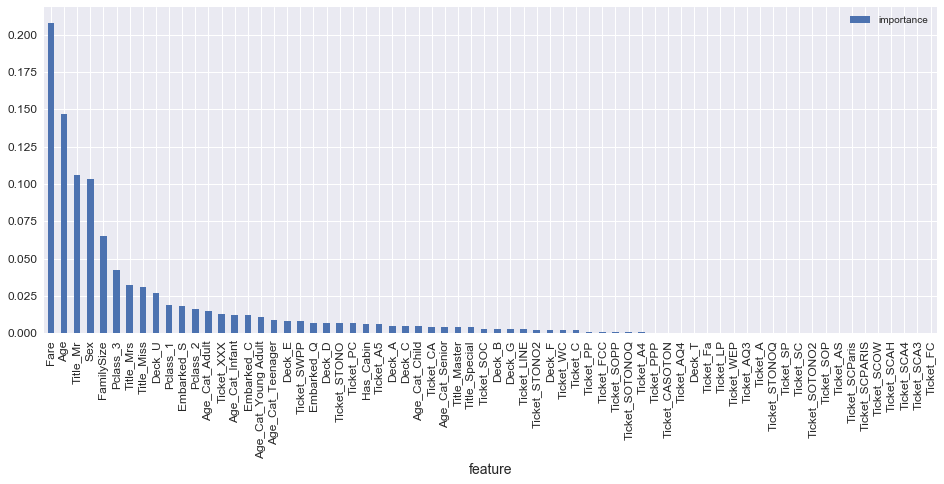

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier();

refclasscol = strat_train_set_X.columns

# fit random forest classifier on the training set
rfc_model.fit(strat_train_set_X, strat_train_set_y);

# extract important features
score = np.round(rfc_model.feature_importances_, 3)
importances = pd.DataFrame({'feature':refclasscol, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# plot importances
importances.plot.bar();

### Step 7 - Build Model based on Important Features
Let's see how selection of features based on their importnace impact the model building and their cross validation score

In [33]:
feat_imp_threshold = importances.loc[importances['importance'] < np.max(importances['importance'])]

from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

# fit model using each importance as a threshold
thresholds = np.sort(np.unique(feat_imp_threshold.importance))
for thresh in thresholds:
    # selecting features using threshold
    selection = SelectFromModel(rfc_model, threshold=thresh, prefit=True)
    select_train_x = selection.transform(strat_train_set_X)
    
    # training model
    selection_model = RandomForestClassifier()
    selection_model.fit(select_train_x, strat_train_set_y)
    scores = cross_val_score(selection_model, select_train_x, strat_train_set_y, cv=10)
    
    # prediction through model
    select_test_x = selection.transform(strat_test_set_X)
    pred_y = selection_model.predict(select_test_x)
    
    # evaluating model
    accuracy = metrics.accuracy_score(strat_test_set_y, pred_y)
    confusion = metrics.confusion_matrix(strat_test_set_y, pred_y)
    TP = confusion[1][1]; TN = confusion[0][0]; FP = confusion[0][1]; FN = confusion[1][0];
    sensitivity = TP / float(TP + FN); specifivity = TN / float(TN + FP);
    
    print("Thresh=%.3f, n=%d, Test Accuracy: %.2f%%, Cross Val Mean Score=%.2f%%, Sensitivity=%.2f%%, Specifivity=%.2f%%" % 
          (thresh, select_train_x.shape[1], accuracy*100.0, scores.mean()*100.0, sensitivity*100.0, specifivity*100.0))


Thresh=0.000, n=68, Test Accuracy: 83.80%, Cross Val Mean Score=80.62%, Sensitivity=75.00%, Specifivity=89.19%
Thresh=0.001, n=43, Test Accuracy: 81.56%, Cross Val Mean Score=80.21%, Sensitivity=73.53%, Specifivity=86.49%
Thresh=0.002, n=39, Test Accuracy: 81.56%, Cross Val Mean Score=79.77%, Sensitivity=67.65%, Specifivity=90.09%
Thresh=0.003, n=35, Test Accuracy: 86.03%, Cross Val Mean Score=80.62%, Sensitivity=76.47%, Specifivity=91.89%
Thresh=0.004, n=32, Test Accuracy: 83.24%, Cross Val Mean Score=80.90%, Sensitivity=75.00%, Specifivity=88.29%
Thresh=0.005, n=26, Test Accuracy: 82.68%, Cross Val Mean Score=81.46%, Sensitivity=73.53%, Specifivity=88.29%
Thresh=0.006, n=25, Test Accuracy: 79.89%, Cross Val Mean Score=81.19%, Sensitivity=64.71%, Specifivity=89.19%
Thresh=0.007, n=22, Test Accuracy: 81.56%, Cross Val Mean Score=81.46%, Sensitivity=72.06%, Specifivity=87.39%
Thresh=0.008, n=20, Test Accuracy: 80.45%, Cross Val Mean Score=81.47%, Sensitivity=67.65%, Specifivity=88.29%
T

We can observe that usually when the threshold is 0.005 where number of features are 29, cross validation score and other scoring parameters are giving better results.

In [34]:
thresh = 0.005
final_selection = SelectFromModel(rfc_model, threshold=0.005, prefit=True)
final_train_x = final_selection.transform(strat_train_set_X)
    
# training model
final_modelRF = RandomForestClassifier(n_estimators=300, max_depth=10)
final_modelRF.fit(final_train_x, strat_train_set_y)
scores = cross_val_score(final_modelRF, final_train_x, strat_train_set_y, cv=10)
    
# prediction through model
final_test_x = final_selection.transform(strat_test_set_X)
pred_y = final_modelRF.predict(final_test_x)
    
# evaluating model
accuracy = metrics.accuracy_score(strat_test_set_y, pred_y)
confusion = metrics.confusion_matrix(strat_test_set_y, pred_y)
TP = confusion[1][1]; TN = confusion[0][0]; FP = confusion[0][1]; FN = confusion[1][0];
sensitivity = TP / float(TP + FN); specifivity = TN / float(TN + FP);

print("Thresh=%.3f, n=%d, Test Accuracy: %.2f%%, Cross Val Mean Score=%.2f%%, Sensitivity=%.2f%%, Specifivity=%.2f%%" % 
    (thresh, final_train_x.shape[1], accuracy*100.0, scores.mean()*100.0, sensitivity*100.0, specifivity*100.0))
print(final_modelRF)

Thresh=0.005, n=26, Test Accuracy: 84.92%, Cross Val Mean Score=82.32%, Sensitivity=76.47%, Specifivity=90.09%
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Step 8 - Use Ensemble Model & Feature Selection
#### Ensembling Model
There is a wide variety of models to use, from logistic regression to decision trees and more sophisticated ones such as random forests and gradient boosted trees. We'll be using Random Forests. Random Froests has proven a great efficiency in Kaggle competitions.

For more details about why ensemble methods perform well, you can refer to these posts:
- http://mlwave.com/kaggle-ensembling-guide/
- http://www.overkillanalytics.net/more-is-always-better-the-power-of-simple-ensembles/

#### Feature selection
We've come up to more than 60 features so far. This number is quite large. When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential.

In fact, feature selection comes with many benefits:
- It decreases redundancy among the data
- It speeds up the training process
- It reduces overfitting

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# create train and test data
final_train = combined_data[ :train_idx]
final_test = combined_data[test_idx: ]

# separate target column from encoded data and remove categorical feature for whom dummy variables were created
final_train_set_X = final_train.drop(['Survived'], axis=1)
final_test_set_X = final_test.drop(['Survived'], axis=1)

final_train_set_y = final_train[['Survived']].copy()
final_test_set_y = final_test[['Survived']].copy()

# Final test set
final_test_set_X = test.drop('Survived', axis=1).values

print('Train dataset dimension: {} rows, {} columns'.format(final_train_set_X.shape[0], final_train_set_X.shape[1]))
print('Test dataset dimension: {} rows, {} columns'.format(final_test_set_X.shape[0], final_test_set_X.shape[1]))

Train dataset dimension: 891 rows, 68 columns
Test dataset dimension: 418 rows, 68 columns


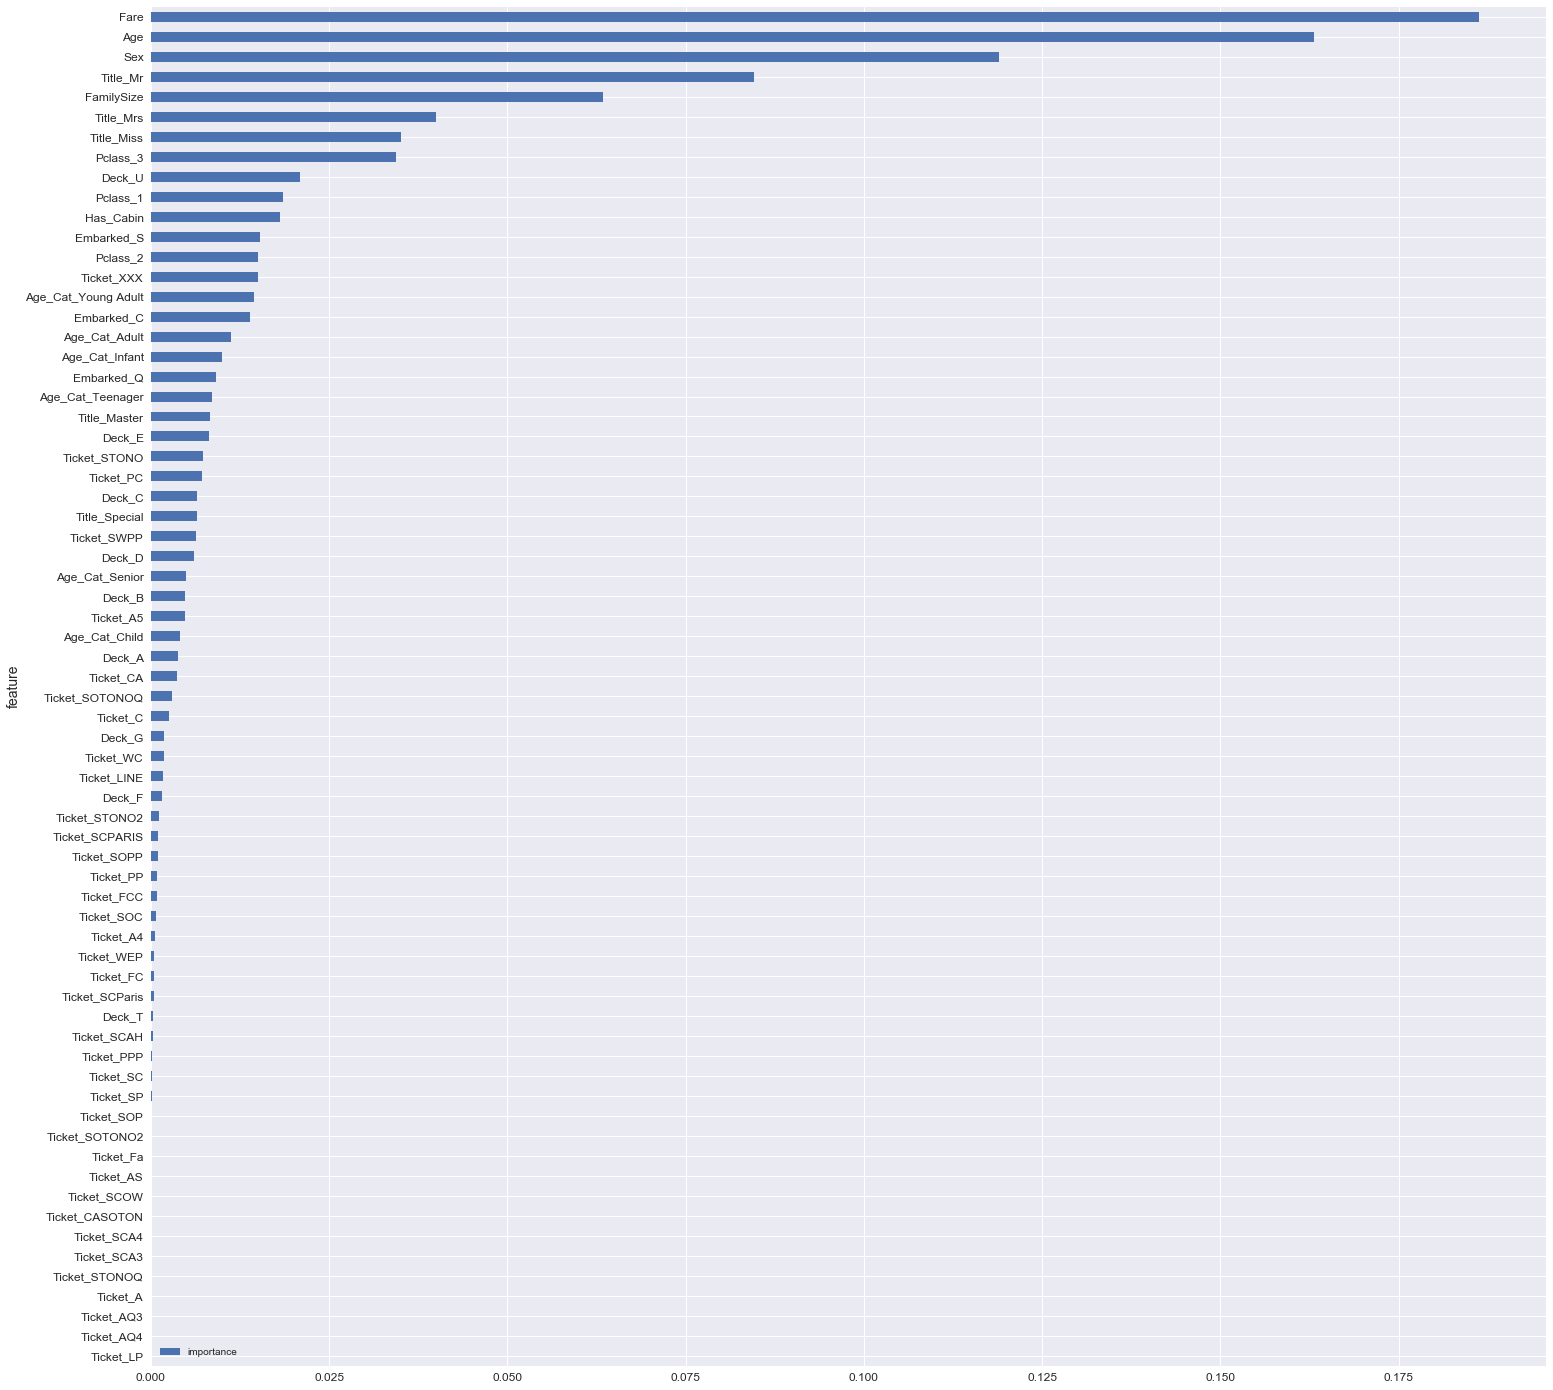

In [36]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf = clf.fit(final_train_set_X, final_train_set_y)

features = pd.DataFrame()
features['feature'] = final_train_set_X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25));

In [37]:
model = SelectFromModel(clf, threshold=0.005, prefit=True)
train_reduced = model.transform(final_train_set_X)
test_reduced = model.transform(final_test_set_X)

print('Train dataset dimension: {} rows, {} columns'.format(final_train_set_X.shape[0], final_train_set_X.shape[1]))
print('Test dataset dimension: {} rows, {} columns'.format(final_test_set_X.shape[0], final_test_set_X.shape[1]))

print('Reduced Train dataset dimension: {} rows, {} columns'.format(train_reduced.shape[0], train_reduced.shape[1]))
print('Reduced Test dataset dimension: {} rows, {} columns'.format(test_reduced.shape[0], test_reduced.shape[1]))

Train dataset dimension: 891 rows, 68 columns
Test dataset dimension: 418 rows, 68 columns
Reduced Train dataset dimension: 891 rows, 28 columns
Reduced Test dataset dimension: 418 rows, 28 columns


In [38]:
logreg_model = LogisticRegression()
logreg_cv_model = LogisticRegressionCV()
rf_model = RandomForestClassifier()
gboost_model = GradientBoostingClassifier()
svc_model = SVC(probability=True)
dt_model = DecisionTreeClassifier()
ab_model = AdaBoostClassifier()
knn_model = KNeighborsClassifier(5)
gnb_model = GaussianNB()

models = [logreg_model, logreg_cv_model, rf_model, gboost_model, svc_model, dt_model, ab_model, knn_model, gnb_model]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=final_train_set_y, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('***********************************************************************')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8294629346117277
***********************************************************************
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8283140889719685
***********************************************************************
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8093007024998696
***********************************************************************
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8271902097569781
***********************************************************************
Cross-validation of : <class 'sklearn.svm.classes.SVC'>
CV score = 0.7251115775766042
***********************************************************************
Cross-validation of : <class 'sklearn.tree.tree.DecisionTreeClassifier'>
CV score = 0.79573510339

In [39]:
# Hyperparameters Tuning for Decision Tree
dt_param_grid = {
                 'max_depth' : [4, 6, 8],
                 'criterion': ['gini', 'entropy'],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 }
decision_tree = DecisionTreeClassifier()
dt_cross_val = StratifiedKFold(n_splits=5)

dt_grid_search = GridSearchCV(decision_tree,
                              scoring='accuracy',
                              param_grid=dt_param_grid,
                              cv=dt_cross_val,
                              verbose=1
                              )

dt_grid_search.fit(train_reduced, final_train_set_y)
dt_model = dt_grid_search
dt_parameters = dt_grid_search.best_params_

rf_model = RandomForestClassifier(**dt_parameters)

score = compute_score(clf=dt_model, X=train_reduced, y=final_train_set_y, scoring='accuracy')
print('Cross-validation of : {0}'.format(dt_model.__class__))
print('After Hyperparameters tuning CV score = {0}'.format(score))
print('Best score: {}'.format(dt_grid_search.best_score_))
print('Best parameters: {}'.format(dt_grid_search.best_params_))

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    2.2s finished


Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    2.4s finished


Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    2.0s finished


Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    2.2s finished


Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    2.0s finished


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Cross-validation of : <class 'sklearn.model_selection._search.GridSearchCV'>
After Hyperparameters tuning CV score = 0.7980203114632418
Best score: 0.8237934904601572
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3}


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    2.1s finished


In [40]:
# Hyperparameters Tuning for Random Forest
rf_param_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
rf_cross_val = StratifiedKFold(n_splits=5)

rf_grid_search = GridSearchCV(forest,
                              scoring='accuracy',
                              param_grid=rf_param_grid,
                              cv=rf_cross_val,
                              verbose=1
                              )

rf_grid_search.fit(train_reduced, final_train_set_y)
rf_model = rf_grid_search
rf_parameters = rf_grid_search.best_params_

rf_model = RandomForestClassifier(**rf_parameters)

score = compute_score(clf=rf_model, X=train_reduced, y=final_train_set_y, scoring='accuracy')
print('Cross-validation of : {0}'.format(rf_model.__class__))
print('After Hyperparameters tuning CV score = {0}'.format(score))
print('Best score: {}'.format(rf_grid_search.best_score_))
print('Best parameters: {}'.format(rf_grid_search.best_params_))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
After Hyperparameters tuning CV score = 0.8193124161505818
Best score: 0.8406285072951739
Best parameters: {'bootstrap': False, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  1.4min finished


### Step10 - Selecting Final Model & Predicting Survival
This is my 5th trial of predicting Survival response and based on the 5 trail, i got my best accuracy score on kaggle site by using random forest algorithm by applying hyper-parameters tuning and feature selection. Below are the details of my 5 trials how the feature were selected and models were used.
- <b>Trial 1</b> - I used few features and features such as ticket and Cabin were not really used. Total features used after dummy variables were 15 and Random Forest Classifier algorithm was applied using Feature Selection mechanism. <b>Kaggle Score - 0.76555</b>
- <b>Trial 2</b> - Ticket and Cabin features were used including other hyper-parameters. Total 68 features were created after dummy mechanism on categorical features. After Feature Selection mechanism, 13 features were selcted for classification algorithm. Logistic Regression, Logistic Regression CV, Random Forest Classifier, Gradient Boosting Classifier, SVC, Decision Tree Classifier, Ada Boost Classifier were used as ensemble models to predict Survival response. <b>Kaggle Score - 0.77990</b>
- <b>Trial 3</b> - Same as Trail 2 with addition of KNN Neighbors Classifier & Gaussian Naive Bayes. Hyper-parameters tuning on Random Forest Classifier using GridSearchCV to identify best parameters and score. Same ensemble model techniques were used except SVC, KNN Neighbors Classifier & Gaussian Naive Bayes as their cross validation score was below 80%. <b>Kaggle Score - 0.77990</b>
- <b>Trial 4</b> - Same as Trail 3 but here Hyper-parameters tuning applied on both Random Forest Classifier & Decision Tree Classifier using GridSearchCV to identify best parameters and score. Again, ensemble model technique used as Trail 4. <b>Kaggle Score - 0.77033</b>
- <b>Trial 5</b> - Total 68 features were derived and after Feature Selection using Random Forest Classifier 30 features were used for building classification model. Hyper-parameters tuning applied on Random Forest Classifier using GridSearchCV to identify best parameters and score. Finally, best parameters were used to predict the Survival response with only Random Forest Classifier. <b>Kaggle Score - 0.80382</b>

In [41]:
# Using Ensemble model technique by considering all the models trained to predict Survival (Trial 4)
models = [logreg_model, logreg_cv_model, rf_model, gboost_model, dt_model, ab_model]

trained_models = []
for model in models:
    model.fit(train_reduced, final_train_set_y)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(test_reduced)[:, 1])

# Take the mean of probability identified by each model
kaggle_df = pd.DataFrame(predictions).T
kaggle_df['out'] = kaggle_df.mean(axis=1)
kaggle_df['PassengerId'] = titanic_test_org['PassengerId']
kaggle_df['out'] = kaggle_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

# dataframe with predictions
kaggle_df = kaggle_df[['PassengerId', 'out']]
kaggle_df.columns = ['PassengerId', 'Survived']

# save to csv
kaggle_df.to_csv('C:/Users/ajana/Desktop/DSP - Python/gender_submission.csv', index=False)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    2.4s finished


In [42]:
# Predict Survival using only Random Forest Classifier after hyper-parameter tuning and feature selection (Trial 5)
rf_model.fit(train_reduced, final_train_set_y)

predictions = []
predictions = rf_model.predict(test_reduced).astype(int)

kaggle_df = pd.DataFrame()
kaggle_df['PassengerId'] = titanic_test_org['PassengerId']
kaggle_df['Survived'] = predictions

# save to csv
kaggle_df.to_csv('C:/Users/ajana/Desktop/DSP - Python/gender_submission.csv', index=False)

### Step 11 - Improve the Model
We can improve the performance of model with more permutations and combinations. If you want my code for other trials then let me know. I will work on to improve this more later as and when I get time, but, as of 25-Jul, my score on kaggle is 0.80382 and rank is 1134 which is top 11%